<a href="https://colab.research.google.com/github/FLjv77/ML_Physics/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Data Preperation

*Import data*

In [4]:
drive.mount('/content/drive')
data = pd.read_pickle('drive/MyDrive/Colab Notebooks/MLPhysics/Data/data.gz', compression='gzip')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sigma_x sigma_x,sigma_x sigma_y,sigma_x sigma_z,sigma_x I,sigma_y sigma_x,sigma_y sigma_y,sigma_y sigma_z,sigma_y I,sigma_z sigma_x,sigma_z sigma_y,sigma_z sigma_z,sigma_z I,I sigma_x,I sigma_y,I sigma_z,determinant,is_entangled
0,0.063394,-0.030475,0.054712,-0.207182,-0.100642,-0.119281,-0.153700,-0.023325,0.153603,-0.300538,0.093314,-0.630818,-0.216680,0.398048,-0.138596,0.000616,0
1,-0.140623,0.156939,-0.097862,0.257280,-0.117338,0.358434,-0.060805,-0.193301,0.137166,-0.247568,0.386097,0.055322,0.120454,0.082775,-0.244874,-0.000829,1
2,0.442904,-0.025508,0.252517,-0.073066,0.145303,-0.178814,-0.361514,0.193291,0.241775,-0.416794,0.362798,-0.320768,-0.151865,0.054982,-0.160275,-0.005184,1
3,0.048773,-0.057124,0.175588,-0.294659,0.064488,-0.270791,0.149194,-0.020468,-0.258235,-0.292408,0.492207,-0.848040,0.258235,0.292408,-0.457389,-0.000223,1
4,0.332981,-0.228244,-0.309372,-0.270460,-0.155656,-0.288667,-0.392645,0.338129,-0.030599,-0.103525,0.117726,0.090513,-0.189008,0.057949,-0.197000,-0.001448,1


*Separate feature and label*

In [5]:
feature = data.drop(["determinant", "is_entangled"], axis = 1)
label = data["is_entangled"]

In [6]:
feature.head()

,sigma_x sigma_x,sigma_x sigma_y,sigma_x sigma_z,sigma_x I,sigma_y sigma_x,sigma_y sigma_y,sigma_y sigma_z,sigma_y I,sigma_z sigma_x,sigma_z sigma_y,sigma_z sigma_z,sigma_z I,I sigma_x,I sigma_y,I sigma_z
0,0.063394,-0.030475,0.054712,-0.207182,-0.100642,-0.119281,-0.153700,-0.023325,0.153603,-0.300538,0.093314,-0.630818,-0.216680,0.398048,-0.138596
1,-0.140623,0.156939,-0.097862,0.257280,-0.117338,0.358434,-0.060805,-0.193301,0.137166,-0.247568,0.386097,0.055322,0.120454,0.082775,-0.244874
2,0.442904,-0.025508,0.252517,-0.073066,0.145303,-0.178814,-0.361514,0.193291,0.241775,-0.416794,0.362798,-0.320768,-0.151865,0.054982,-0.160275
3,0.048773,-0.057124,0.175588,-0.294659,0.064488,-0.270791,0.149194,-0.020468,-0.258235,-0.292408,0.492207,-0.848040,0.258235,0.292408,-0.457389
4,0.332981,-0.228244,-0.309372,-0.270460,-0.155656,-0.288667,-0.392645,0.338129,-0.030599,-0.103525,0.117726,0.090513,-0.189008,0.057949,-0.197000


*Transform Data*

In [7]:
degrees = [1,2,3,4,5]
transformeds_feature = []

for d in degrees:
  poly_transformer = PolynomialFeatures(degree = d, include_bias = False)
  transformeds_feature.append(poly_transformer.fit_transform(feature))

# Apply Linear Model

In [8]:
res = []
threshold = 0.5
test_size = 0.2
data_len  = len(data)
for i, data in enumerate(transformeds_feature):
  #Split data into test and train
  feature_train, feature_test, label_train, label_test = train_test_split(data, label, test_size = test_size)

  #Preparation linear model
  linear_reg = LinearRegression().fit(feature_train, label_train)
  y_predicted = linear_reg.predict(feature_test)
  y_predicted_class = [1 if pred >= threshold else 0 for pred in y_predicted]

  #Calculate accuracy
  true_label_count = np.sum(np.logical_not(np.logical_xor(y_predicted_class, label_test)))
  accuracy = true_label_count/len(label_test) * 100
  true_label_count = np.sum(np.logical_not(np.logical_xor(y_predicted_class, label_test)))
  print("Accuracy Test: ", (true_label_count/(data_len * test_size)) * 100, "% ____", "degree: ", i+1)
  res.append({
      'degree': i+1,
      'accuracy': accuracy
  })

Accuracy Test:  66.0 % ____ degree:  1
Accuracy Test:  81.89999999999999 % ____ degree:  2
Accuracy Test:  82.69999999999999 % ____ degree:  3
Accuracy Test:  77.45 % ____ degree:  4
Accuracy Test:  67.2 % ____ degree:  5


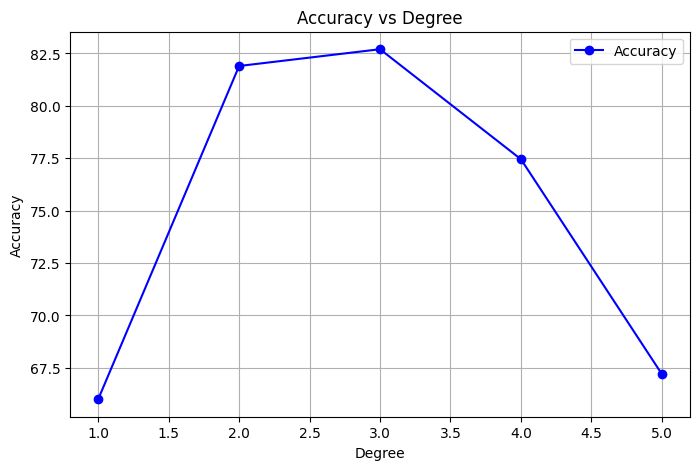

In [10]:
degrees = [item['degree'] for item in res]
accuracies = [item['accuracy'] for item in res]
plt.figure(figsize=(8, 5))
plt.plot(degrees, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Degree')
plt.grid(True)
plt.legend()
plt.show()